<a href="https://colab.research.google.com/github/juanescendales/IAIdentifiacionDeColoresFlores/blob/master/MicroProyecto2_ClusteringCultivoFlores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificación de color en imágenes de cultivos de flores


Se quiere determinar por medio de clustering los tipos de cultivos flores visibles e
indicar el porcentaje cultivado, realizando la mayor caracterización de los datos posible. Esto con un data-set de dos imagenes



Priemero vamos a importar los archivos necesesarios para el programa

In [1]:
from google.colab import files
import cv2
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
uploaded = files.upload()

Saving Cultivos_de_Flores1.jpg to Cultivos_de_Flores1.jpg
Saving Cultivos_de_Flores2.jpeg to Cultivos_de_Flores2.jpeg


# Preprocesamiento de los datos

## Captura de las imagenes

Estas son nuestras imagenes seleccionadas

In [2]:
imagen1Matriz = cv2.imread('Cultivos_de_Flores1.jpg') #Convierte la imagen en una array de arrays que cada uno representa un pixel en codigo BGR
imagen1Matriz = cv2.cvtColor(imagen1Matriz,cv2.COLOR_BGR2RGB) #Convierte los codfigo BGR en codigos RGB
imagen1 = imagen1Matriz.reshape((imagen1Matriz.shape[0]*imagen1Matriz.shape[1],3)) #Convierte en un array lineal que contiene arrays de 3 posiciones con los codigos RGB
imagen1

array([[209, 229, 254],
       [212, 232, 255],
       [217, 233, 255],
       ...,
       [ 33,  26,  33],
       [ 50,  40,  48],
       [ 40,  31,  36]], dtype=uint8)

In [3]:
imagen2Matriz = cv2.imread('Cultivos_de_Flores2.jpeg') #Convierte la imagen en una array de arrays que cada uno representa un pixel en codigo BGR
imagen2Matriz = cv2.cvtColor(imagen2Matriz,cv2.COLOR_BGR2RGB) #Convierte los codfigo BGR en codigos RGB
imagen2 = imagen2Matriz.reshape((imagen2Matriz.shape[0]*imagen2Matriz.shape[1],3)) #Convierte en un array lineal que contiene arrays de 3 posiciones con los codigos RGB
imagen2

array([[118, 148, 234],
       [118, 148, 234],
       [118, 148, 234],
       ...,
       [205, 209, 212],
       [118, 121, 128],
       [ 52,  54,  67]], dtype=uint8)

Graficamente son las siguientes

IMAGEN 1

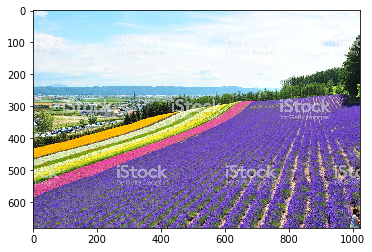

In [4]:
plt.imshow(imagen1Matriz)

IMAGEN2

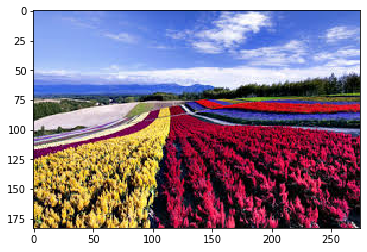

In [5]:
plt.imshow(imagen2Matriz)

## Imagenes tratadas con Adobe Photoshop

Necesitamos eliminar el ruido de las fotos para concentrarnos en las flores de las imagenes, para ello utilizamos el programa de Adobe Photoshop para quitar el ruido y remplzarlo por un color que no vamos a tener en cuenta a la hora del analisis

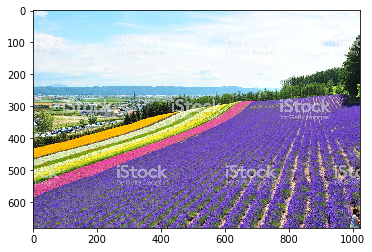

In [6]:
#Imagen 1 sin ruido
imagen1Matriz = cv2.imread('Cultivos_de_Flores1.jpg') #Convierte la imagen en una array de arrays que cada uno representa un pixel en codigo BGR
imagen1Matriz = cv2.cvtColor(imagen1Matriz,cv2.COLOR_BGR2RGB) #Convierte los codfigo BGR en codigos RGB
imagen1 = imagen1Matriz.reshape((imagen1Matriz.shape[0]*imagen1Matriz.shape[1],3)) #Convierte en un array lineal que contiene arrays de 3 posiciones con los codigos RGB
#Imagen 2 sin ruido
imagen2Matriz = cv2.imread('Cultivos_de_Flores2.jpeg') #Convierte la imagen en una array de arrays que cada uno representa un pixel en codigo BGR
imagen2Matriz = cv2.cvtColor(imagen2Matriz,cv2.COLOR_BGR2RGB) #Convierte los codfigo BGR en codigos RGB
imagen2 = imagen2Matriz.reshape((imagen2Matriz.shape[0]*imagen2Matriz.shape[1],3)) #Convierte en un array lineal que contiene arrays de 3 posiciones con los codigos RGB
plt.imshow(imagen1Matriz)

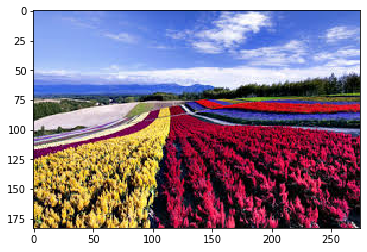

In [7]:
plt.imshow(imagen2Matriz)

# Proceso de clusterisacion


##Creacion de la clase AnalizadorDeImagenFlores

Se crea la clase "AnalizadorDeImagenFlores" la cual contiene como atributos la cantidad de clusters a utilizar , la imagen transformada a un array de pixeles, los colores centrales o centroides del cluster , las etiquetas que este genera con el proceso y la asignacion de colores dominantes a cada pixel utilizando estas etiquetas

In [0]:

from sklearn.cluster import KMeans
class  AnalizadorDeImagenFlores:
  def __init__(self,imagenProcesada,clusters=3):
    self.clusters = clusters
    self.imagenTransformada = imagenProcesada    #Ingresamos el array lineal con los pixeles de la imagen
    kmeans = KMeans(n_clusters = self.clusters)
    kmeans.fit(self.imagenTransformada)
    self.coloresCentrales = kmeans.cluster_centers_ #Array con las especificaciones de los colores centroides
    self.labels = kmeans.labels_                #Array con la asignacion de cada uno de los pixeles a cada centroide , va de 0 a la cantidad de clusters - 1 
    self.asignar = []
    for label in self.labels:
      self.asignar.append(self.rgb_to_hex(self.coloresCentrales[label]))


  def getColoresDominantes(self):
    return self.coloresCentrales.astype(int)
  def rgb_to_hex(self,rgb):
    return '#%02x%02x%02x' % (int(rgb[0]),int(rgb[1]),int(rgb[2]))   # Convierte una referencia rgb a una hex
  def plotClusters(self):
    figura =plt.figure()
    ax = Axes3D(figura)
    X = self.imagenTransformada
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=self.asignar , s = 1)
    plt.show()

A continuacion vamos a ver en detalle que hace cada uno de los metodos de nuestra clase

## Analisis con K Means de la imagen **1**

### Analisis de los atributos

**Constructor __init__**
En este constructor utilizamos la imagen procesada y el numero de clusters para la imagen que se inicializan a la hora de crear el objeto para utilizar kmeans y obtener los colores centrales y los labels

Para la imagen 1 en concreto se decidio utilizar -n- clusters que corresponden a los colores distinguibles en la imagen , miremos cuales son los colores dominantes o centroides

In [23]:
analizadorImagen1 = AnalizadorDeImagenFlores(imagen1,5)
analizadorImagen1.getColoresDominantes()

array([[166, 152, 175],
       [109,  83, 168],
       [203, 190,  49],
       [226, 243, 247],
       [ 71,  81,  61]])

Como se puede observar , el algortmo nos encuentra -n- centroides representados por arrays de 3 elementos, que indica las coordenadas en el espacio y a su vez el valor en RBG del color dominante

Se utiliza la funcion **getColoresDominantes()** ya que en general los centroides son valores continuos , de esta manera los podemos representar en su forma entera y esto tiene mas sentido al corresponder a un valor RGB




Miremos como son los labels

In [24]:
analizadorImagen1.labels

array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

Como se puede observar los labels es un array con el indice a un centroide (color dominante) al que corresponde cada pixel en orden. 
Va desde 0 a -n-1-

### Graficando los datos

A continuacion vamos a graficar en 3D los datos que obtuvimos de K Means

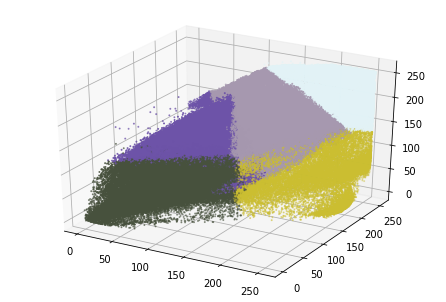

In [25]:
analizadorImagen1.plotClusters()